In [ ]:
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import fbprophet as fb

In [ ]:
!wget https://github.com/Waseem0912-coder/zep_analytics/blob/main/sensex.csv.xlsx

--2022-06-25 13:14:54--  https://github.com/Waseem0912-coder/zep_analytics/blob/main/sensex.csv.xlsx
Resolving github.com (github.com)... 13.114.40.48
Connecting to github.com (github.com)|13.114.40.48|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘sensex.csv.xlsx’

sensex.csv.xlsx         [ <=>                ] 126.25K  --.-KB/s    in 0.1s    

2022-06-25 13:14:54 (1.05 MB/s) - ‘sensex.csv.xlsx’ saved [129276]



In [ ]:
from fbprophet import Prophet


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 96 kB 3.2 MB/s 


In [ ]:
df = pd.read_csv("/content/sense.csv")

In [ ]:
df

,Date,Price,Open,High,Low,Volume,Chg%
0,05/22/2019,39110.21,39086.21,39249.08,38903.87,16.11M,0.0036
1,05/23/2019,38811.39,39591.77,40124.96,38651.61,29.02M,-0.0076
2,05/24/2019,39434.72,39076.28,39476.97,38824.26,17.64M,0.0161
3,05/27/2019,39683.29,39536.23,39821.94,39353.16,16.53M,0.0063
4,05/28/2019,39749.73,39765.64,39828.65,39498.65,15.83M,0.0017
...,...,...,...,...,...,...,...
759,06/14/2022,52693.57,52495.94,53095.32,52459.48,6.94M,-0.0029
760,06/15/2022,52541.39,52650.41,52867.05,52495.19,5.91K,-0.0029
761,06/16/2022,51495.79,53018.91,53142.50,51425.48,9.19M,-0.0199
762,06/17/2022,51360.42,51181.99,51652.83,50921.22,8.27M,-0.0026


In [ ]:
model = Prophet()

In [ ]:
df = df.reset_index()

In [ ]:
df

,index,Date,Price,Open,High,Low,Volume,Chg%
0,0,06/20/2022,51597.84,51470.03,51714.61,51062.93,6.96M,0.0046
1,1,06/17/2022,51360.42,51181.99,51652.83,50921.22,8.27M,-0.0026
2,2,06/16/2022,51495.79,53018.91,53142.50,51425.48,9.19M,-0.0199
3,3,06/15/2022,52541.39,52650.41,52867.05,52495.19,5.91K,-0.0029
4,4,06/14/2022,52693.57,52495.94,53095.32,52459.48,6.94M,-0.0029
...,...,...,...,...,...,...,...,...
759,759,05/28/2019,39749.73,39765.64,39828.65,39498.65,15.83M,0.0017
760,760,05/27/2019,39683.29,39536.23,39821.94,39353.16,16.53M,0.0063
761,761,05/24/2019,39434.72,39076.28,39476.97,38824.26,17.64M,0.0161
762,762,05/23/2019,38811.39,39591.77,40124.96,38651.61,29.02M,-0.0076


In [ ]:
df[['ds', 'y']] = df[['Date','Open']]

In [ ]:
model.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future = model.make_future_dataframe(periods=365)

In [ ]:
forecast = model.predict(future)

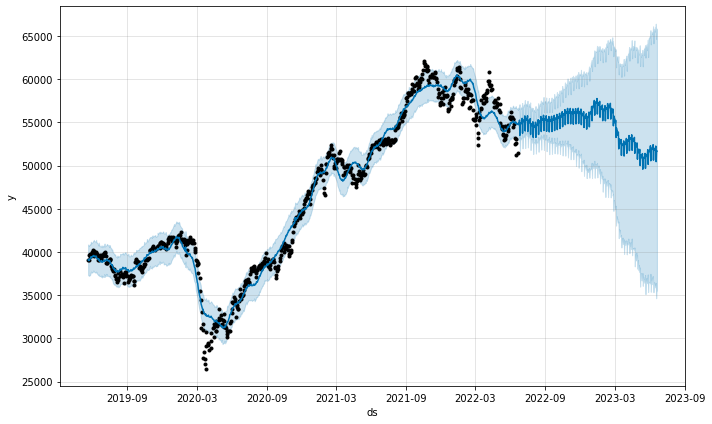

In [ ]:
model.plot(forecast)
plt.show()

In [ ]:
df = df[['ds','y']]
last = df[len(df)-20:]

In [ ]:
last

,ds,y
744,05/24/2022,54307.56
745,05/25/2022,54254.07
746,05/26/2022,53950.84
747,05/27/2022,54671.50
748,05/30/2022,55507.75
749,05/31/2022,55622.01
750,06/01/2022,55588.27
751,06/02/2022,55384.15
752,06/03/2022,56245.60
753,06/06/2022,55610.64


In [ ]:
df = df[:-20]

In [ ]:
df

,ds,y
0,05/22/2019,39086.21
1,05/23/2019,39591.77
2,05/24/2019,39076.28
3,05/27/2019,39536.23
4,05/28/2019,39765.64
...,...,...
739,05/17/2022,53285.19
740,05/18/2022,54554.89
741,05/19/2022,53070.30
742,05/20/2022,53513.97


In [ ]:
fbp = Prophet(daily_seasonality = True)

In [ ]:
fbp.fit(df)

In [ ]:
future = fbp.make_future_dataframe(periods=60)
forecast = fbp.predict(future)

In [ ]:
from fbprophet.plot import plot_plotly, plot_components_plotly

In [ ]:
plot_plotly(fbp, forecast)

In [ ]:
fbp = Prophet(daily_seasonality = True)
fbp.fit(last)
future = fbp.make_future_dataframe(periods=0)
forecast = fbp.predict(future)
plot_plotly(fbp, forecast)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 15.


In [ ]:
forecast[forecast.ds=='2022-05-24']['yhat']

744    55144.742662
Name: yhat, dtype: float64

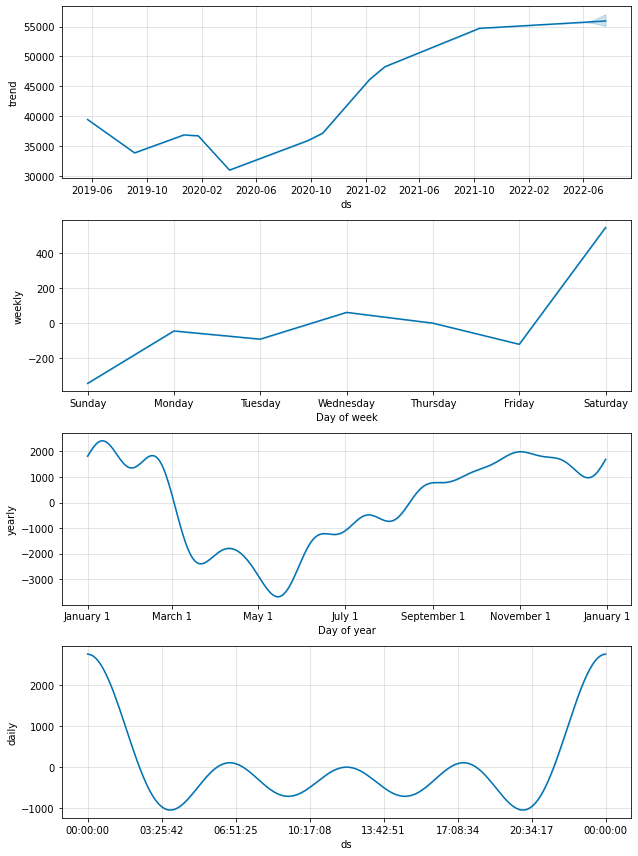

In [ ]:
fig2= fbp.plot_components(forecast)